The goal of this homework is to get familiar with MLflow, the tool for experiment tracking and model management

https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2024/02-experiment-tracking/homework.md

# Q1. Install MLflow

What's the version that you have?

In [1]:
!mlflow --version

mlflow, version 2.13.0


# Q2. Download and preprocess the data

Download the data for January, February and March 2023 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [2]:
url_green_jan_2023 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet'
url_green_feb_2023 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet'
url_green_mar_2023 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet'

In [3]:
!python ./src/preprocess_data.py --raw_data_path ./data/raw --dest_path ./output

How many files were saved to `OUTPUT_FOLDER`

In [4]:
!ls -lh ./output

total 6.9M
-rw-rw-rw- 1 codespace codespace 128K May 27 19:17 dv.pkl
-rw-rw-rw- 1 codespace codespace 2.4M May 27 19:17 test.pkl
-rw-rw-rw- 1 codespace codespace 2.3M May 27 19:17 train.pkl
-rw-rw-rw- 1 codespace codespace 2.2M May 27 19:17 val.pkl


__Answer__: 4

# Q3. Train a model with autolog

Your task is to modify the [script](./src/train.py) to enable `autologging` with `MLflow`, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked.

What is the value of the `min_samples_split` parameter:

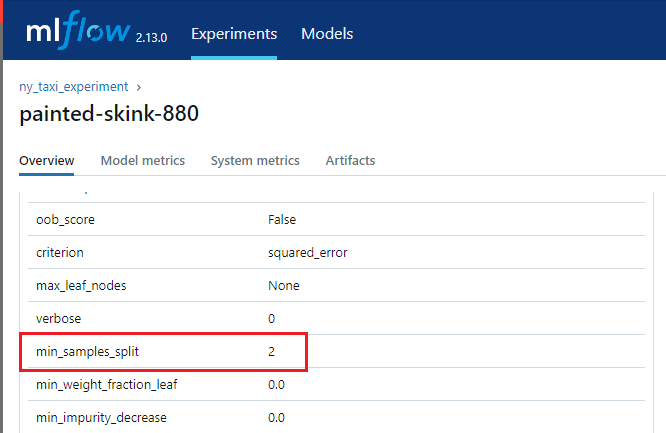

__Answer__: 2

# Q4. Launch the tracking server locally

Your task is to:

* launch the tracking server on your local machine,
* select a SQLite db for the backend store and a folder called artifacts for the artifacts store.

`mlflow ui --backend-store-uri sqlite:///mlflow.db`

In addition to `backend-store-uri`, what else do you need to pass to properly configure the server?

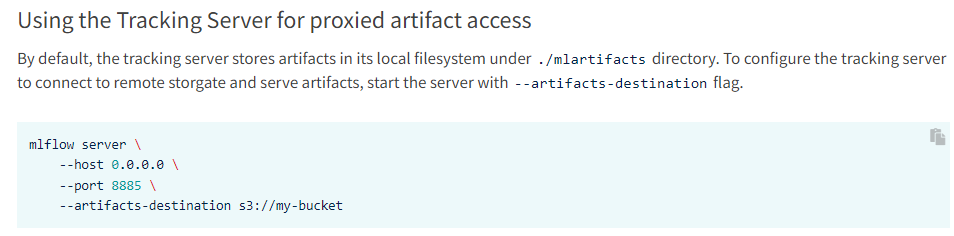

__Answer__: artifacts-destination

# Q5. Tune model hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `hyperopt`. We have prepared the script [hpo.py](src/hpo.py) for this exercise.

In [5]:
!python src/hpo.py

2024/05/27 19:17:34 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
100%|██████████| 15/15 [01:00<00:00,  4.01s/trial, best loss: 5.335419588556921]


What's the best validation RMSE that you got?

__Answer:__ 5.335

# Q6. Promote the best model to the model registry

Your task is to update the script [register_model.py](./src/register_model.py) so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

In [8]:
!python src/register_model.py

./output 5.355041749098929 {'max_depth': '20', 'min_samples_leaf': '1', 'min_samples_split': '9', 'n_estimators': '19', 'random_state': '42'}
2024/05/27 19:25:53 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/27 19:26:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/codespace/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."
./output 5.37159585587677 {'max_depth': '18', 'min_samples_leaf': '1', 'min_samples_split': '6', 'n_estimators': '13', 'random_state': '42'}
2024/05/27 19:26:03 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
./output 5.538069949003994 {'max_depth': '5', 'min_samples_leaf': '3', 'min_samples_split': '8', 'n_estimators': '21', 'random_state': '42'}
2024/05/

What is the test RMSE of the best model?

__Answer:__ 5.567